In [1]:
import pandas as pd

In [2]:
# define data path to endangered species csv file
endagered_species_data_path = "../Data/species-listings-by-tax-group-report_animals_and_plants_optimized.csv"

# define data path to wd_species csv file
wd_species_data_path = "../Data/wikidata/wd_species_df.csv"

# define data path to biodiversity csv file
biodiversity_data_path = "../Data/biodiversity.csv"

In [3]:
endagered_species = pd.read_csv(endagered_species_data_path)
wd = pd.read_csv(wd_species_data_path)
biodiversity = pd.read_csv(biodiversity_data_path)

<AxesSubplot:>

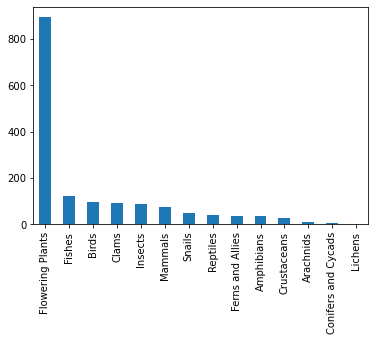

In [4]:
endagered_species['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

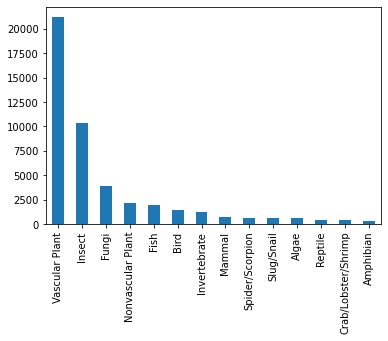

In [6]:
biodiversity['Categories'].value_counts().plot(kind='bar')

In [7]:
# read mapping from excel sheet
category_mapping_df = pd.read_excel('../Data/CategoryMapping.xlsx')

# remove leading and training blanks as well as additional characters at the beginning and the end of the strings
def mapp_wd (sample_str):
    sample_str = sample_str.strip()
    sample_str = sample_str[0:-5]
    sample_str = sample_str[1:-1]
    return sample_str

# apply function to loaded data frame
category_mapping_df['Original Category Label'] = category_mapping_df['Original Category Label'].apply(lambda x: mapp_wd(x))

# create mapping dictionary of of the data frame
wd_mapping_dic = dict(zip(category_mapping_df['Original Category Label'], category_mapping_df['Category Mapping']))

In [8]:
wd['classLabel']= wd['classLabel'].map(wd_mapping_dic)

<AxesSubplot:>

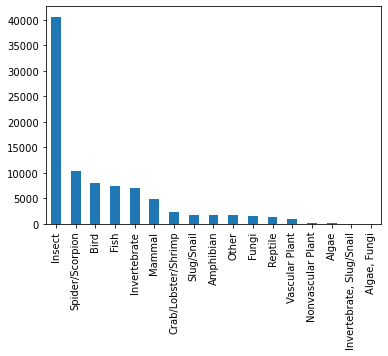

In [13]:
wd['classLabel'].value_counts().plot(kind='bar')

In [9]:
  
# create dictionatry for mapping
mapping_dic = {'Mammals':'Mammal',
                'Birds':'Bird',
                'Insects':'Insect',
                'Fishes':'Fish',
                'Reptiles':'Reptile',
                'Clams':'Invertebrate',
                'Snails':'Slug/Snail',
                'Arachnids':'Spider/Scorpion',
                'Amphibians':'Amphibian',
                'Crustaceans':'Crab/Lobster/Shrimp',
                'Lichens':'Fungi',
                'Ferns and Allies':'Vascular Plant',
                'Flowering Plants':'Vascular Plant',
                'Conifers and Cycads':'Vascular Plant'        
}

In [10]:
endagered_species['category'] = endagered_species['category'].map(mapping_dic)

<AxesSubplot:>

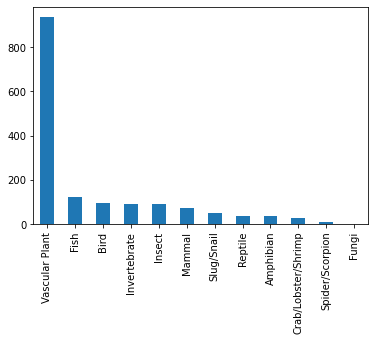

In [11]:
endagered_species['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

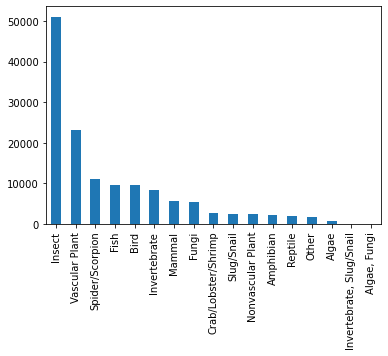

In [15]:
# histogram of combined data
combined_categories = wd['classLabel'].append(endagered_species['category'].append(biodiversity['Categories']))
combined_categories.value_counts().plot(kind='bar')

In [16]:
combined_categories

0            Mammal
1               NaN
2              Fish
3              Fish
4              Fish
            ...    
46042        Insect
46043        Insect
46044        Insect
46045        Insect
46046    Slug/Snail
Length: 147622, dtype: object